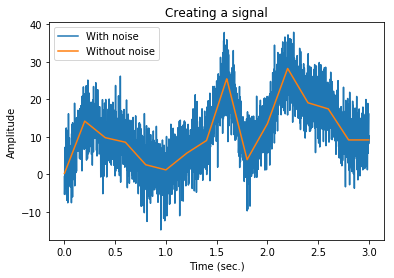

In [16]:
#Running mean time series filter
#Author - Bhuwan Chandra

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

#-------------------------Creating a random signal---------------------------------

Sampling_Rate = 1000 #Hertz(Hz)
time = np.arange(0,3,1/Sampling_Rate) #One Sample point over 3 seconds

n = len(time)
p = 15 #Poles for random interpolation
Noise_Level = 5 # noise level, measured in standard deviations

# Amplitude modulator and noise level
#Interpolating across random time points (15 here)
ampl   = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30) 
#Adding noise to the signal
noise  = Noise_Level * np.random.randn(n)
signal = ampl + noise

filtsig = np.zeros(n)

plt.plot(time,signal,label='With noise')
plt.plot(time,ampl,label='Without noise')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Creating a signal')

plt.show()

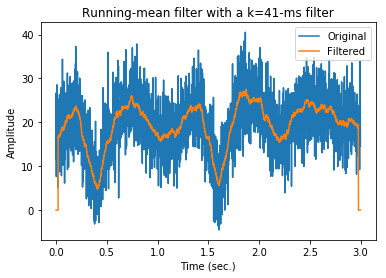

In [15]:
#Applying running mean filter on the above signal

# Initialize filtered signal vector
Filt_Signal = np.zeros(n)

k = 20 # Filter window is actually k*2+1

for i in range(k+1,n-k-1):
    Filt_Signal[i] = np.mean(signal[i-k:i+k]) # Each point is the average of k surrounding points
    
windowsize = 1000*(k*2+1) / Sampling_Rate # Rather than points, converting windowsize for sampling in miliseconds
    
plt.plot(time,signal,label='Original')
plt.plot(time,Filt_Signal,label='Filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter'%windowsize)

plt.show()